In [98]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
import scipy.signal as signal

In [6]:
from scipy.signal import convolve

In [93]:
def find_nearest_idx(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx#array[idx]

In [55]:
def Func(I,M,n,theta):
    I[I<0]=0
    tmp=I**n
    return M*tmp/(theta**n+tmp)

Rate model equation in continuous form
$$\tau_e \frac{d\mu_e}{dt}=-\mu_e+F[K_{ee}*\mu_e-K_{ei}*\mu_i+I_{Th}]$$
$$\tau_i \frac{d\mu_i}{dt}=-\mu_i+F[K_{ie}*\mu_e+I_{Th}]$$

In [132]:
Aee=2;Aie=2;Aei=1;
Kesgm=4;Kisgm=9;

InputA=10;sgm=10

taue=10;taui=10

In [133]:
X=np.arange(-20,20,0.1)
tstep=0.1
TL=(0,100)
timespac=np.arange(TL[0],TL[1],tstep)
T=int((TL[1]-TL[0])/tstep)
N=int(X.size)
mue=np.zeros((T,N))
mui=np.zeros((T,N))

Kee=Aee* np.exp(-X**2/(2*Kesgm))/np.sqrt(2*np.pi*Kesgm)
Kei=Aei* np.exp(-X**2/(2*Kisgm))/np.sqrt(2*np.pi*Kisgm)
Kie=Aie* np.exp(-X**2/(2*Kesgm))/np.sqrt(2*np.pi*Kesgm)

Input=np.exp(-X**2/(2*sgm))*InputA

for i in range(1,T):
    ee=convolve(mue[i-1,:],Kee,mode="same")
    ie=convolve(mue[i-1,:],Kie,mode="same")
    ei=convolve(mui[i-1,:],Kei,mode="same")
    mue[i,:]=mue[i-1,:]+(-mue[i-1,:]+Func(ee-ei+Input,1,1.51,0.5))*tstep/taue
    mui[i,:]=mui[i-1,:]+(-mui[i-1,:]+Func(ie+Input,3,1.75,0.5))*tstep/taui

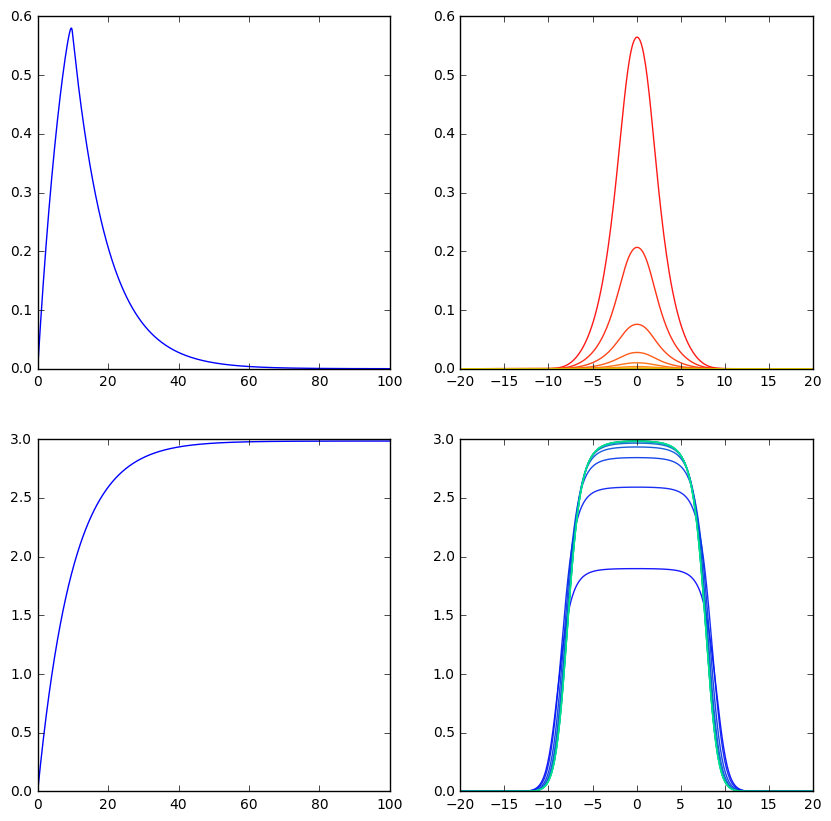

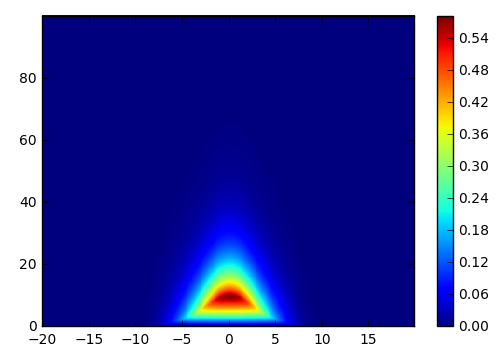

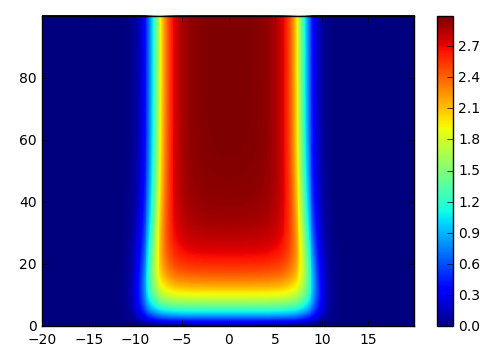

In [134]:
plt.figure(1, figsize=[10,10])
plt.subplot(221)
idx=find_nearest_idx(X,0)
plt.plot(timespac,mue[:,idx])
plt.subplot(223)
idx=find_nearest_idx(X,0)
plt.plot(timespac,mui[:,idx])
plt.subplot(222)
for i in range(10):
    tslice=((10-i-1)*TL[0]+ (i+1)*TL[1])/10
    idx=find_nearest_idx(timespac,tslice)
    c=cm.autumn(i/10,0.9)
    plt.plot(X,mue[idx,:],color=c)
plt.subplot(224)
for i in range(10):
    tslice=((10-i-1)*TL[0]+ (i+1)*TL[1])/10
    idx=find_nearest_idx(timespac,tslice)
    c=cm.winter(i/10,0.9)
    plt.plot(X,mui[idx,:],color=c)
plt.show()

plt.figure(2)
ax=plt.subplot(111)
ax.pcolorfast(X,timespac,mue)#imshow(mue)#
img=ax.get_images()[0]
plt.colorbar(img)
plt.show()
plt.figure(3)
ax=plt.subplot(111)
ax.pcolorfast(X,timespac,mui)#imshow(mui)
img=ax.get_images()[0]
plt.colorbar(img)
plt.show()

In [64]:
mue

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

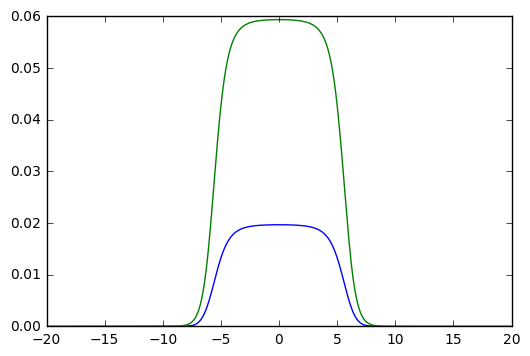

In [59]:
plt.figure()
plt.plot(X,mue[2,:])
plt.plot(X,mui[2,:])
plt.show()

In [ ]:
signal.convolve